In [106]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import datetime
import plotly
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv("autos.csv")
data.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats  Price  
0   58.2 bhp    4.0   1.75  
1   47.3 bhp    5.0  12.50  
2  147.8 bhp    7.0   4.50  
3   null bhp    5.0   6.00  
4  82.85 bhp    5.0  17.74

# EDA and data wrangling

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  Price              1234 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 115.8+ KB


In [109]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [110]:
data['Name'].value_counts()

Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Volkswagen Polo 1.2 MPI Highline                        8
Maruti Swift Dzire VDI                                  8
Audi A6 2011-2015 2.0 TDI Premium Plus                  7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: Name, Length: 768, dtype: int64

In [111]:
len(data['Name'].unique()) # enough car versions in dataset
# if we have brand name manufacterure then no longer we need his feature.

768

In [112]:
make_manu = data['Name'].str.split(' ',expand = True)
data['Manufacturer'] = make_manu[0]
data.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats  Price Manufacturer  
0   58.2 bhp    4.0   1.75       Maruti  
1   47.3 bhp    5.0  12.50       Maruti  
2  147.8 bhp    7.0   4.50       Toyota  
3   null bhp    5.0   6.00       Toyota  
4  82.85 bhp    5.0  17.74      Hyundai

In [113]:
len(data['Manufacturer'].unique()) # data of 40 brands

29

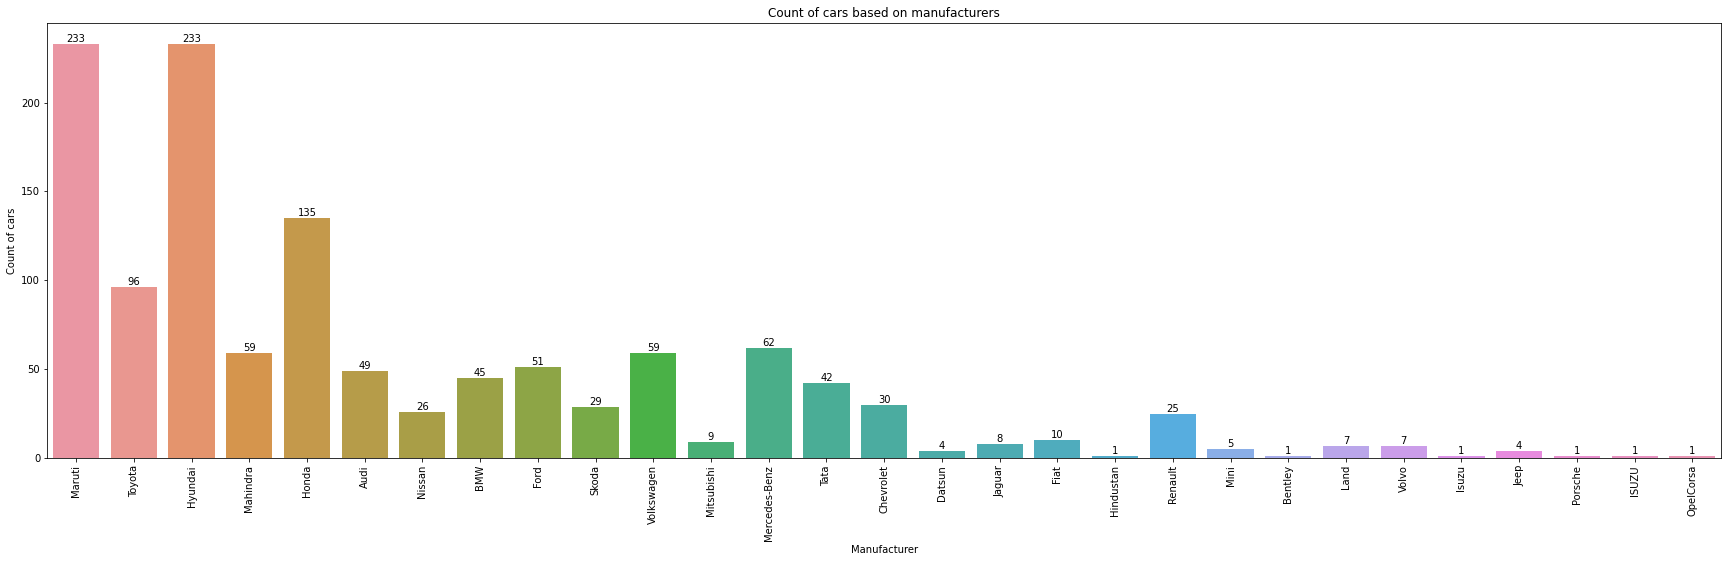

In [114]:
# plot the car sold of different Manufacturer
plt.figure(figsize = (30, 8))
plot = sns.countplot(x = 'Manufacturer', data = data)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")
plt.show()

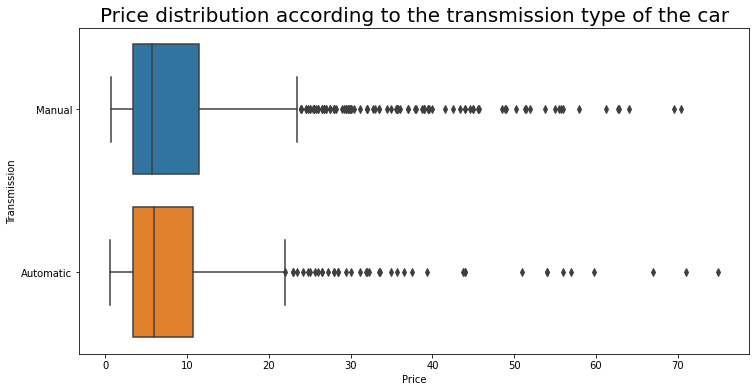

In [115]:
# Let's see the gearbox vs. Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Price',y='Transmission',data=data)
plt.title("Price distribution according to the transmission type of the car", fontsize=20,ha='center')
plt.show()

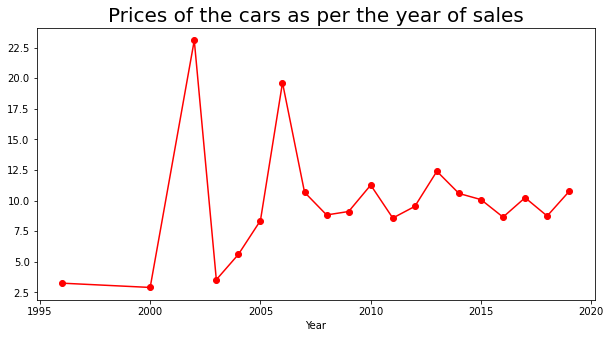

In [116]:
axis = data.groupby('Year')['Price'].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("Prices of the cars as per the year of sales", fontsize=20,ha='center')
plt.show()

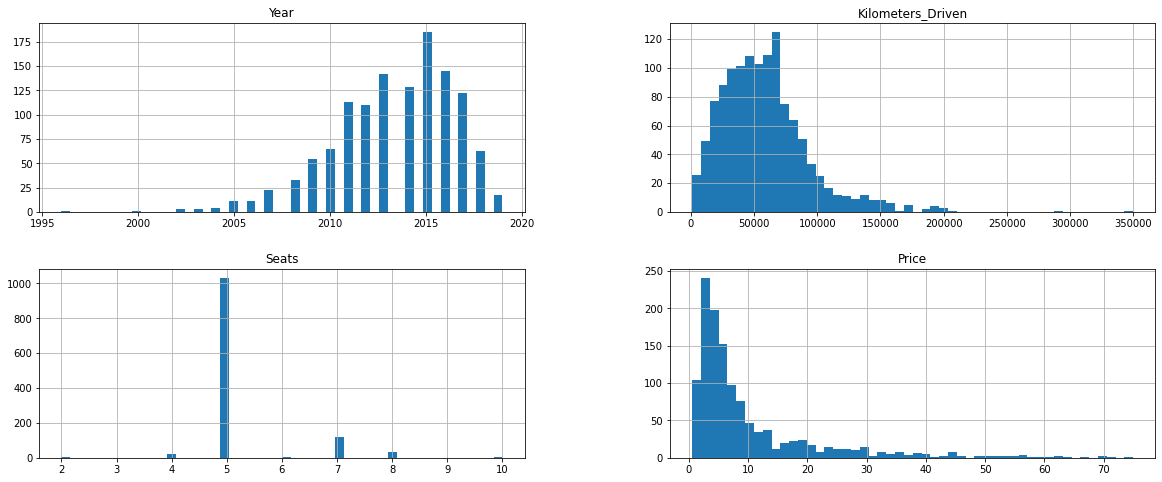

In [117]:
# histogram for all numerical features
data.hist(bins=50, figsize =(20,8))
plt.show()

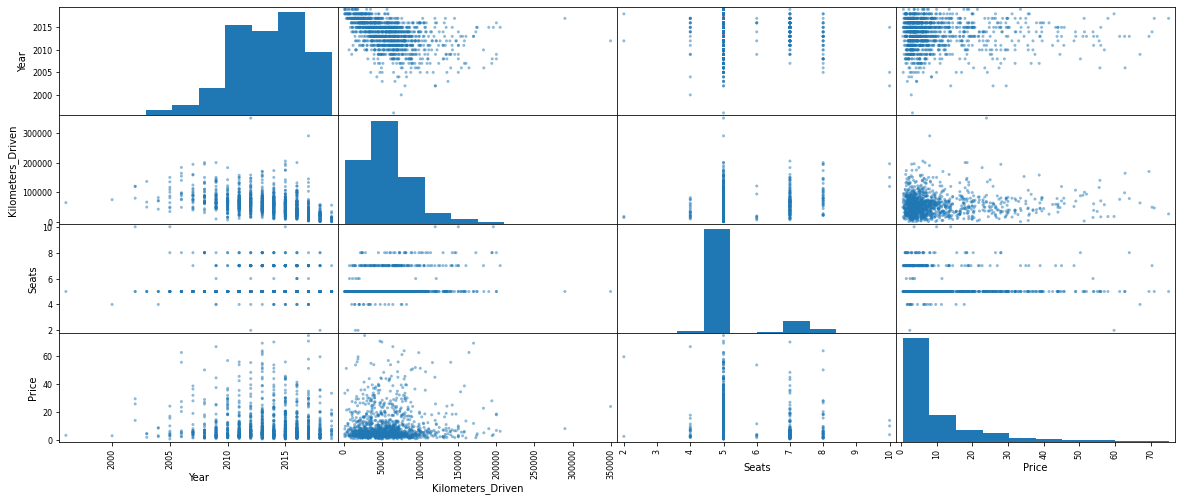

In [118]:
# corelation among numerical variables
from pandas.plotting import scatter_matrix
col = ['Year','Kilometers_Driven', 'Seats', 'Price']
scatter_matrix(data[col], figsize=(20,8))
plt.show()
# diagonal shows histogram of each variable

[]

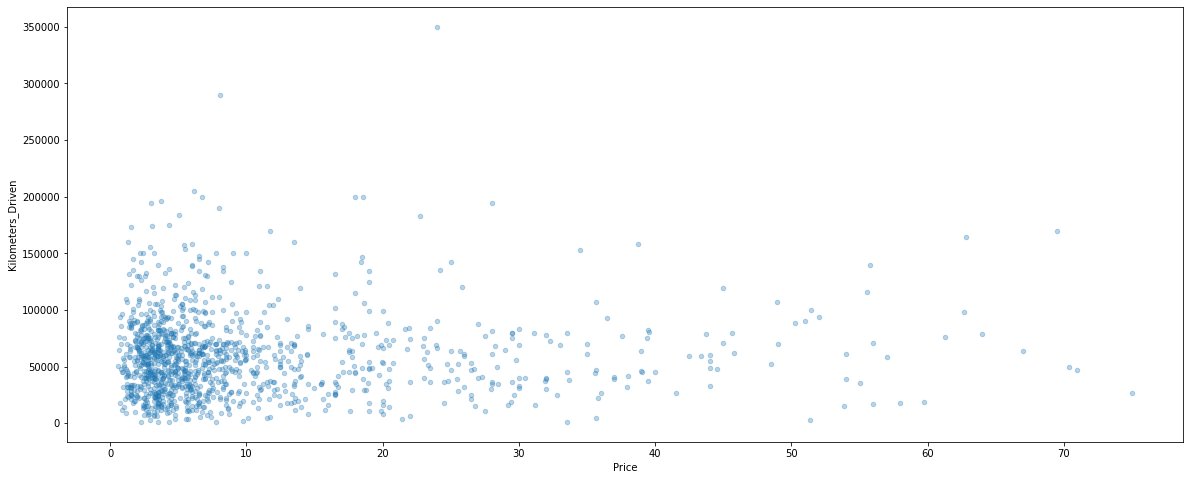

In [119]:
# let's zoom out kilometer driven vs price
import matplotlib
matplotlib.rcParams["figure.figsize"] = [20, 8]
data.plot(kind = 'scatter', x = 'Price', y= 'Kilometers_Driven' ,alpha=0.3)
plt.plot()
# we see we have dense data around less KM, driven and price below <100000

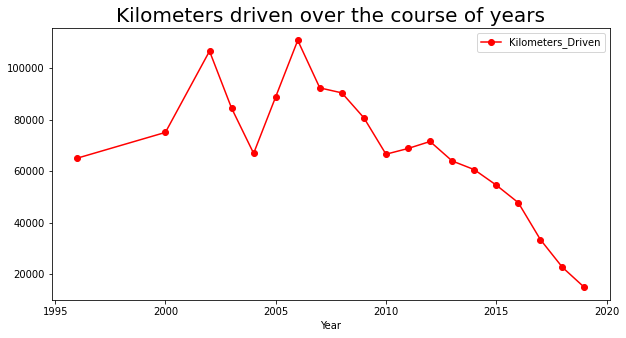

In [120]:
axis = data.groupby('Year')[['Kilometers_Driven']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("Kilometers driven over the course of years", fontsize=20,ha='center')
plt.show()

In [121]:
fig = px.scatter(data,x='Price', y='Kilometers_Driven')
fig.update_layout(title='Price v/s Kilometers_driven',xaxis_title="Kilometers Driven",yaxis_title="Price")
fig.show()

In [122]:
fig = px.scatter(data,x='Seats', y='Price')
fig.update_layout(title='Price v/s No. of seats',xaxis_title="Number of seats",yaxis_title="Price")
fig.show()

In [123]:
# Name and location does not provide info for prediction of price so let's drop those
data.drop(['Name','Location'], axis=1, inplace=True)

In [124]:
# we are intrested in how old car is than year so have that one.
time = datetime.datetime.now()
data['Year_old'] = data['Year'].apply(lambda x: time.year - x)
data.drop(['Year'], axis=1, inplace=True)
data.head()

Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats  Price Manufacturer  Year_old  
0   58.2 bhp    4.0   1.75       Maruti         9  
1   47.3 bhp    5.0  12.50       Maruti        10  
2  147.8 bhp    7.0   4.50       Toyota         6  
3   null bhp    5.0   6.00       Toyota        11  
4  82.85 bhp    5.0  17.74      Hyundai         9

In [125]:
# convert categorical columns into dummy
# milage
mileage = data["Mileage"].str.split(" ", expand = True)
data["Mileage"] = pd.to_numeric(mileage[0], errors = 'coerce')

In [126]:
# Engine 
cc = data["Engine"].str.split(" ", expand = True)
data["Engine"] = pd.to_numeric(cc[0], errors = 'coerce')

# Power
bhp = data["Power"].str.split(" ", expand = True)
data["Power"] = pd.to_numeric(bhp[0], errors = 'coerce')

In [127]:
data.head(3)

Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First    32.26   998.0   
1              54493    Petrol       Manual     Second    24.70   796.0   
2              34000    Diesel       Manual      First    13.68  2393.0   

   Power  Seats  Price Manufacturer  Year_old  
0   58.2    4.0   1.75       Maruti         9  
1   47.3    5.0  12.50       Maruti        10  
2  147.8    7.0   4.50       Toyota         6

In [128]:
data.isnull().sum()

Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
Price                 0
Manufacturer          0
Year_old              0
dtype: int64

In [129]:
# drop the missing rows
data = data.dropna()
data.isnull().sum()

Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Manufacturer         0
Year_old             0
dtype: int64

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  1201 non-null   int64  
 1   Fuel_Type          1201 non-null   object 
 2   Transmission       1201 non-null   object 
 3   Owner_Type         1201 non-null   object 
 4   Mileage            1201 non-null   float64
 5   Engine             1201 non-null   float64
 6   Power              1201 non-null   float64
 7   Seats              1201 non-null   float64
 8   Price              1201 non-null   float64
 9   Manufacturer       1201 non-null   object 
 10  Year_old           1201 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 112.6+ KB


In [131]:
data['Fuel_Type'].unique()

array(['CNG', 'Petrol', 'Diesel', 'LPG'], dtype=object)

In [132]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [133]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [134]:
data['Manufacturer'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Renault', 'Mini', 'Bentley', 'Land', 'Volvo', 'Isuzu', 'Jeep',
       'Porsche', 'ISUZU', 'OpelCorsa'], dtype=object)

In [135]:
data.head()

Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First    32.26   998.0   
1              54493    Petrol       Manual     Second    24.70   796.0   
2              34000    Diesel       Manual      First    13.68  2393.0   
4              29000    Petrol       Manual      First    18.50  1197.0   
5              85609    Diesel       Manual     Second    16.00  2179.0   

    Power  Seats  Price Manufacturer  Year_old  
0   58.20    4.0   1.75       Maruti         9  
1   47.30    5.0  12.50       Maruti        10  
2  147.80    7.0   4.50       Toyota         6  
4   82.85    5.0  17.74      Hyundai         9  
5  140.00    7.0   2.35     Mahindra         7

In [136]:
final_data = pd.get_dummies(data)
final_data.head()

Kilometers_Driven  Mileage  Engine   Power  Seats  Price  Year_old  \
0              40929    32.26   998.0   58.20    4.0   1.75         9   
1              54493    24.70   796.0   47.30    5.0  12.50        10   
2              34000    13.68  2393.0  147.80    7.0   4.50         6   
4              29000    18.50  1197.0   82.85    5.0  17.74         9   
5              85609    16.00  2179.0  140.00    7.0   2.35         7   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  ...  \
0              1                 0              0  ...   
1              0                 0              0  ...   
2              0                 1              0  ...   
4              0                 0              0  ...   
5              0                 1              0  ...   

   Manufacturer_Mitsubishi  Manufacturer_Nissan  Manufacturer_OpelCorsa  \
0                        0                    0                       0   
1                        0                    0                       0   
2                        0                    0                       0   
4                        0                    0                       0   
5                        0                    0                       0   

   Manufacturer_Porsche  Manufacturer_Renault  Manufacturer_Skoda  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
4                     0                     0                   0   
5                     0                     0                   0   

   Manufacturer_Tata  Manufacturer_Toyota  Manufacturer_Volkswagen  \
0                  0                    0                        0   
1                  0                    0                        0   
2                  0                    1                        0   
4                  0                    0                        0   
5                  0                    0                        0   

   Manufacturer_Volvo  
0                   0  
1                   0  
2                   0  
4                   0  
5                   0  

[5 rows x 45 columns]

In [137]:
# split target and dependent
x = final_data.drop("Price",axis=1)
y = final_data["Price"].copy()
x.shape,y.shape

((1201, 44), (1201,))

In [141]:
# Start with modeling 
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size=.8,random_state=42)
x_train.shape,y_train.shape

((960, 44), (960,))

In [139]:
# feature scaling 
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
standardScaler.fit(x_test)
x_test = standardScaler.transform(x_test)

In [142]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)

-0.2210248331232021

In [144]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)
y_pred = linearRegression.predict(x_test)
r2_score(y_test, y_pred)

-0.014175185896096787

In [145]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = final_data.columns
vif['VIF'] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
22           Manufacturer_Fiat    inf
23           Manufacturer_Ford    inf
25        Manufacturer_Hyundai    inf
26          Manufacturer_ISUZU    inf
27          Manufacturer_Isuzu    inf
28         Manufacturer_Jaguar    inf
29           Manufacturer_Jeep    inf
30           Manufacturer_Land    inf
31       Manufacturer_Mahindra    inf
32         Manufacturer_Maruti    inf
33  Manufacturer_Mercedes-Benz    inf
34           Manufacturer_Mini    inf
35     Manufacturer_Mitsubishi    inf
36         Manufacturer_Nissan    inf
37      Manufacturer_OpelCorsa    inf
38        Manufacturer_Porsche    inf
39        Manufacturer_Renault    inf
40          Manufacturer_Skoda    inf
41           Manufacturer_Tata    inf
42         Manufacturer_Toyota    inf
43     Manufacturer_Volkswagen    inf
24          Manufacturer_Honda    inf
44          Manufacturer_Volvo    inf
11      Transmission_Automatic    inf
13            Owner_Type_First    inf
7                Fuel_Type_CNG    inf
8             Fuel_Type_Diesel    inf
9                Fuel_Type_LPG    inf
10            Fuel_Type_Petrol    inf
21         Manufacturer_Datsun    inf
12         Transmission_Manual    inf
14   Owner_Type_Fourth & Above    inf
15           Owner_Type_Second    inf
16            Owner_Type_Third    inf
17           Manufacturer_Audi    inf
18            Manufacturer_BMW    inf
19        Manufacturer_Bentley    inf
20      Manufacturer_Chevrolet    inf
2                       Engine  10.88
3                        Power   8.45
1                      Mileage   3.48
4                        Seats   2.49
6                     Year_old   1.83
0            Kilometers_Driven   1.71
5                        Price   1.04

In [ ]:
# model is very very bad
# possible reason dataset is very small <1K sample